In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def print_cross_traffic_on_off(filename):
    with open(filename) as f:
        lines = f.readlines()
    on_count = 0; off_count = 0
    last_match_idx = 0
    for i, l in enumerate(lines):
        if l == 'background traffic is: off\n':
            off_count += 1
            print(lines[i-1], lines[i], end='')
            print("on count: {}, off count: {}".format(on_count, off_count))
            print("")
        if l == 'background traffic is: on\n':
            on_count += 1
            print(lines[i-1], lines[i], end='')
            print("on count: {}, off count: {}".format(on_count, off_count))
            print("")
                

In [4]:
print_cross_traffic_on_off('./datadumps/ctcp17final.dump')

Sending to 100.64.0.1:9090
 background traffic is: on
on count: 1, off count: 0

timestamp: 9884, average throughput: 113.528 Mpbs
 background traffic is: off
on count: 1, off count: 1

timestamp: 19869, average throughput: 93.6043 Mpbs
 background traffic is: on
on count: 2, off count: 1

timestamp: 29927, average throughput: 112.725 Mpbs
 background traffic is: off
on count: 2, off count: 2

timestamp: 39898, average throughput: 87.9728 Mpbs
 background traffic is: on
on count: 3, off count: 2

timestamp: 49957, average throughput: 89.5786 Mpbs
 background traffic is: off
on count: 3, off count: 3

timestamp: 59880, average throughput: 100.815 Mpbs
 background traffic is: on
on count: 4, off count: 3

timestamp: 69882, average throughput: 128.064 Mpbs
 background traffic is: off
on count: 4, off count: 4

timestamp: 79905, average throughput: 131.245 Mpbs
 background traffic is: on
on count: 5, off count: 4

timestamp: 89939, average throughput: 132.786 Mpbs
 background traffic is: o

In [12]:
def get_crosstraffic_mbits_sent(n_switches, rate):
    return n_switches * rate * 10

def get_total_avail_mbits(t_end, t_start, n_switches, bg_rate):
    return 240 * (t_end - t_start)  - get_crosstraffic_mbits_sent(n_switches, bg_rate)

In [13]:
def extract_time_and_throughput(filename):
    time = []; throughput = []
    with open(filename) as f:
        for line in f.readlines():
            m = re.search(r'timestamp: (\d+), average throughput: (\d+\.\d+) Mpbs', line)
            if m is not None:
                time.append(int(m.group(1)))
                throughput.append(float(m.group(2)))

#     return np.asarray(time), np.asarray(throughput)
    return np.stack([time, throughput], axis=1)
        

In [14]:
ctcp17 = extract_time_and_throughput('./datadumps/ctcp17final.dump')
ctcp34 = extract_time_and_throughput('./datadumps/ctcp34.dump')
ctcp51 = extract_time_and_throughput('./datadumps/ctcp51.dump')
ctcp68 = extract_time_and_throughput('./datadumps/ctcp68.dump')

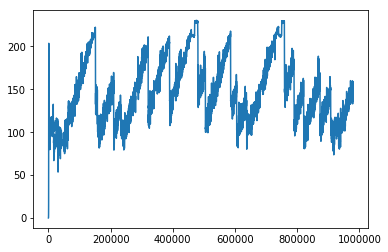

In [15]:
plt.plot(ctcp17[:, 0], ctcp17[:, 1])

In [106]:
ms_to_sec = lambda t: t / 1000.

def print_throughput_stats(tput_data, n_switches, bg_rate):
    t = ms_to_sec(tput_data[:, 0])
    th = tput_data[:, 1]
    dur = t[-1] - t[0]
    mbits_sent = integrate.trapz(th, t)
    avail_mbits = get_total_avail_mbits(t[-1], t[0], n_switches, bg_rate)
    print("Average throughput: {:.2f} Mbps".format(mbits_sent / dur))
    print("Average available bandwidth: {:.2f} Mbps".format(avail_mbits / dur))
    print("Utilization: {:2.2f}%".format(100. * mbits_sent / avail_mbits))

## CTCP 17

In [107]:
print_cross_traffic_on_off('./datadumps/ctcp17final.dump')

Sending to 100.64.0.1:9090
 background traffic is: on
on count: 1, off count: 0

timestamp: 9884, average throughput: 113.528 Mpbs
 background traffic is: off
on count: 1, off count: 1

timestamp: 19869, average throughput: 93.6043 Mpbs
 background traffic is: on
on count: 2, off count: 1

timestamp: 29927, average throughput: 112.725 Mpbs
 background traffic is: off
on count: 2, off count: 2

timestamp: 39898, average throughput: 87.9728 Mpbs
 background traffic is: on
on count: 3, off count: 2

timestamp: 49957, average throughput: 89.5786 Mpbs
 background traffic is: off
on count: 3, off count: 3

timestamp: 59880, average throughput: 100.815 Mpbs
 background traffic is: on
on count: 4, off count: 3

timestamp: 69882, average throughput: 128.064 Mpbs
 background traffic is: off
on count: 4, off count: 4

timestamp: 79905, average throughput: 131.245 Mpbs
 background traffic is: on
on count: 5, off count: 4

timestamp: 89939, average throughput: 132.786 Mpbs
 background traffic is: o

In [108]:
ctcp17 = extract_time_and_throughput('./datadumps/ctcp17final.dump')
print_throughput_stats(ctcp17, 49, 17)

Average throughput: 146.89 Mbps
Average available bandwidth: 231.49 Mbps
Utilization: 63.45%


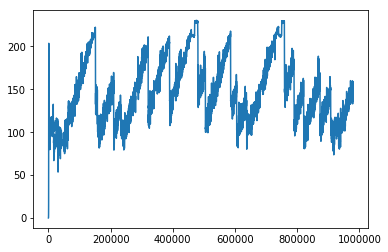

In [27]:
plt.plot(ctcp17[:, 0], ctcp17[:, 1])

## CTCP 34

In [109]:
print_cross_traffic_on_off('./datadumps/ctcp34final.dump')

Sending to 100.64.0.1:9090
 background traffic is: on
on count: 1, off count: 0

timestamp: 9791, average throughput: 103.197 Mpbs
 background traffic is: off
on count: 1, off count: 1

timestamp: 19866, average throughput: 115.968 Mpbs
 background traffic is: on
on count: 2, off count: 1

timestamp: 29837, average throughput: 133.549 Mpbs
 background traffic is: off
on count: 2, off count: 2

timestamp: 39850, average throughput: 135.448 Mpbs
 background traffic is: on
on count: 3, off count: 2

timestamp: 49812, average throughput: 151.788 Mpbs
 background traffic is: off
on count: 3, off count: 3

timestamp: 59793, average throughput: 167.871 Mpbs
 background traffic is: on
on count: 4, off count: 3

timestamp: 69785, average throughput: 110.961 Mpbs
 background traffic is: off
on count: 4, off count: 4

timestamp: 79798, average throughput: 124.452 Mpbs
 background traffic is: on
on count: 5, off count: 4

timestamp: 89775, average throughput: 141.767 Mpbs
 background traffic is: o

In [111]:
ctcp34 = extract_time_and_throughput('./datadumps/ctcp34final.dump')
print_throughput_stats(ctcp34, 8, 34)

Average throughput: 138.16 Mbps
Average available bandwidth: 231.83 Mbps
Utilization: 59.59%


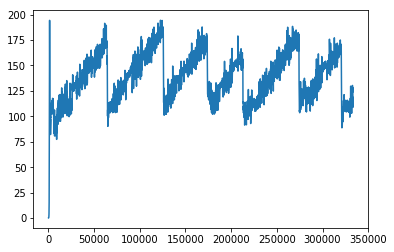

In [112]:
plt.plot(ctcp34[:, 0], ctcp34[:, 1])

## CTCP 51

In [113]:
print_cross_traffic_on_off('./datadumps/ctcp51final.dump')

Sending to 100.64.0.1:9090
 background traffic is: on
on count: 1, off count: 0

timestamp: 9858, average throughput: 105.282 Mpbs
 background traffic is: off
on count: 1, off count: 1

timestamp: 19833, average throughput: 113.626 Mpbs
 background traffic is: on
on count: 2, off count: 1

timestamp: 29828, average throughput: 94.252 Mpbs
 background traffic is: off
on count: 2, off count: 2

timestamp: 39901, average throughput: 128.148 Mpbs
 background traffic is: on
on count: 3, off count: 2

timestamp: 49914, average throughput: 107.018 Mpbs
 background traffic is: off
on count: 3, off count: 3

timestamp: 59905, average throughput: 116.476 Mpbs
 background traffic is: on
on count: 4, off count: 3

timestamp: 69842, average throughput: 107.622 Mpbs
 background traffic is: off
on count: 4, off count: 4

timestamp: 79858, average throughput: 103.71 Mpbs
 background traffic is: on
on count: 5, off count: 4

timestamp: 89866, average throughput: 110.206 Mpbs
 background traffic is: off

In [115]:
ctcp51 = extract_time_and_throughput('./datadumps/ctcp51final.dump')
print_throughput_stats(ctcp51, 15, 51)

Average throughput: 125.00 Mbps
Average available bandwidth: 215.20 Mbps
Utilization: 58.09%


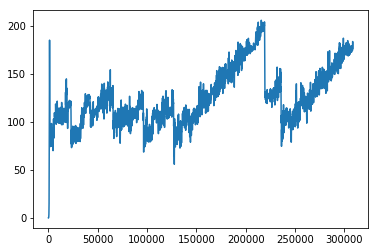

In [116]:
plt.plot(ctcp51[:, 0], ctcp51[:, 1])

## CTCP 68

In [117]:
print_cross_traffic_on_off('./datadumps/ctcp68final.dump')

Sending to 100.64.0.1:9090
 background traffic is: on
on count: 1, off count: 0

timestamp: 9921, average throughput: 102.232 Mpbs
 background traffic is: off
on count: 1, off count: 1

timestamp: 19857, average throughput: 110.503 Mpbs
 background traffic is: on
on count: 2, off count: 1

timestamp: 29870, average throughput: 124.179 Mpbs
 background traffic is: off
on count: 2, off count: 2

timestamp: 39875, average throughput: 146.633 Mpbs
 background traffic is: on
on count: 3, off count: 2

timestamp: 49836, average throughput: 145.376 Mpbs
 background traffic is: off
on count: 3, off count: 3

timestamp: 59871, average throughput: 176.73 Mpbs
 background traffic is: on
on count: 4, off count: 3

timestamp: 69906, average throughput: 165.146 Mpbs
 background traffic is: off
on count: 4, off count: 4

timestamp: 79876, average throughput: 194.782 Mpbs
 background traffic is: on
on count: 5, off count: 4

timestamp: 89893, average throughput: 119.039 Mpbs
 background traffic is: of

In [118]:
ctcp68 = extract_time_and_throughput('./datadumps/ctcp68final.dump')
print_throughput_stats(ctcp68, 24, 68)

Average throughput: 130.62 Mbps
Average available bandwidth: 205.39 Mbps
Utilization: 63.60%


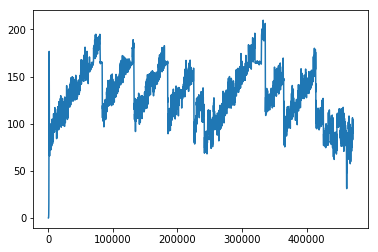

In [42]:
plt.plot(ctcp68[:, 0], ctcp68[:, 1])

## TCP 17

In [119]:
print_cross_traffic_on_off('./datadumps/tcp17.dump')

Sending to 100.64.0.1:9090
 background traffic is: on
on count: 1, off count: 0

timestamp: 9943, average throughput: 12.3075 Mpbs
 background traffic is: off
on count: 1, off count: 1

timestamp: 19933, average throughput: 28.9756 Mpbs
 background traffic is: on
on count: 2, off count: 1

timestamp: 29880, average throughput: 42.7592 Mpbs
 background traffic is: off
on count: 2, off count: 2

timestamp: 39928, average throughput: 68.6983 Mpbs
 background traffic is: on
on count: 3, off count: 2

timestamp: 49931, average throughput: 76.9312 Mpbs
 background traffic is: off
on count: 3, off count: 3

timestamp: 59913, average throughput: 100.719 Mpbs
 background traffic is: on
on count: 4, off count: 3

timestamp: 69941, average throughput: 114.84 Mpbs
 background traffic is: off
on count: 4, off count: 4

timestamp: 79876, average throughput: 131.712 Mpbs
 background traffic is: on
on count: 5, off count: 4

timestamp: 89901, average throughput: 148.874 Mpbs
 background traffic is: of

In [120]:
tcp17 = extract_time_and_throughput('./datadumps/tcp17.dump')
print_throughput_stats(tcp17, 18, 17)

Average throughput: 139.33 Mbps
Average available bandwidth: 231.41 Mbps
Utilization: 60.21%


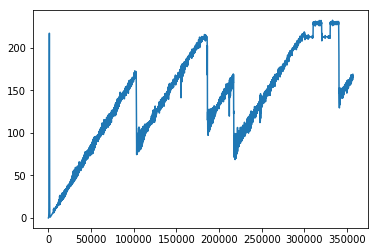

In [37]:
plt.plot(tcp17[:, 0], tcp17[:, 1])

## TCP 34

In [121]:
print_cross_traffic_on_off('./datadumps/tcp34.dump')

Sending to 100.64.0.1:9090
 background traffic is: on
on count: 1, off count: 0

timestamp: 9873, average throughput: 17.4855 Mpbs
 background traffic is: off
on count: 1, off count: 1

timestamp: 19849, average throughput: 27.9461 Mpbs
 background traffic is: on
on count: 2, off count: 1

timestamp: 29892, average throughput: 51.285 Mpbs
 background traffic is: off
on count: 2, off count: 2

timestamp: 39878, average throughput: 68.3398 Mpbs
 background traffic is: on
on count: 3, off count: 2

timestamp: 49889, average throughput: 77.3276 Mpbs
 background traffic is: off
on count: 3, off count: 3

timestamp: 59892, average throughput: 97.0555 Mpbs
 background traffic is: on
on count: 4, off count: 3

timestamp: 69882, average throughput: 117.045 Mpbs
 background traffic is: off
on count: 4, off count: 4

timestamp: 79830, average throughput: 128.494 Mpbs
 background traffic is: on
on count: 5, off count: 4

timestamp: 89846, average throughput: 149.666 Mpbs
 background traffic is: of

In [122]:
tcp34 = extract_time_and_throughput('./datadumps/tcp34.dump')
print_throughput_stats(tcp34, 15, 34)

Average throughput: 130.02 Mbps
Average available bandwidth: 223.48 Mbps
Utilization: 58.18%


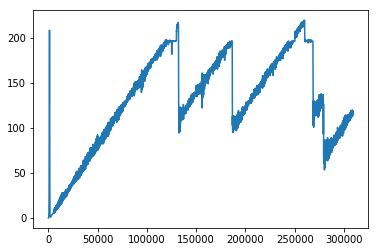

In [123]:
plt.plot(tcp34[:, 0], tcp34[:, 1])

## TCP 51

In [124]:
print_cross_traffic_on_off('./datadumps/tcp51.dump')

Sending to 100.64.0.1:9090
 background traffic is: on
on count: 1, off count: 0

timestamp: 9866, average throughput: 15.5445 Mpbs
 background traffic is: off
on count: 1, off count: 1

timestamp: 19930, average throughput: 26.3244 Mpbs
 background traffic is: on
on count: 2, off count: 1

timestamp: 29877, average throughput: 47.3768 Mpbs
 background traffic is: off
on count: 2, off count: 2

timestamp: 39896, average throughput: 60.7218 Mpbs
 background traffic is: on
on count: 3, off count: 2

timestamp: 49926, average throughput: 84.3827 Mpbs
 background traffic is: off
on count: 3, off count: 3

timestamp: 59849, average throughput: 94.9374 Mpbs
 background traffic is: on
on count: 4, off count: 3

timestamp: 69940, average throughput: 116.33 Mpbs
 background traffic is: off
on count: 4, off count: 4

timestamp: 79883, average throughput: 129.836 Mpbs
 background traffic is: on
on count: 5, off count: 4

timestamp: 89915, average throughput: 150.893 Mpbs
 background traffic is: of

In [125]:
tcp51 = extract_time_and_throughput('./datadumps/tcp51.dump')
print_throughput_stats(tcp51, 13, 51)

Average throughput: 92.49 Mbps
Average available bandwidth: 214.44 Mbps
Utilization: 43.13%


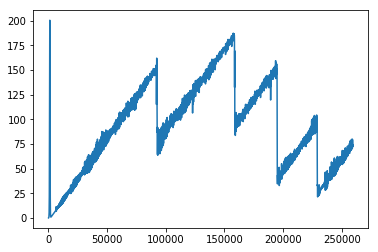

In [53]:
plt.plot(tcp51[:, 0], tcp51[:, 1])

## TCP 68

In [126]:
print_cross_traffic_on_off('./datadumps/tcp68.dump')

Sending to 100.64.0.1:9090
 background traffic is: on
on count: 1, off count: 0

timestamp: 9881, average throughput: 16.0856 Mpbs
 background traffic is: off
on count: 1, off count: 1

timestamp: 19852, average throughput: 24.5707 Mpbs
 background traffic is: on
on count: 2, off count: 1

timestamp: 29882, average throughput: 44.4615 Mpbs
 background traffic is: off
on count: 2, off count: 2

timestamp: 39850, average throughput: 62.5578 Mpbs
 background traffic is: on
on count: 3, off count: 2

timestamp: 49900, average throughput: 81.0362 Mpbs
 background traffic is: off
on count: 3, off count: 3

timestamp: 59838, average throughput: 98.1474 Mpbs
 background traffic is: on
on count: 4, off count: 3

timestamp: 69911, average throughput: 111.668 Mpbs
 background traffic is: off
on count: 4, off count: 4

timestamp: 79847, average throughput: 137.019 Mpbs
 background traffic is: on
on count: 5, off count: 4

timestamp: 89870, average throughput: 145.789 Mpbs
 background traffic is: o

In [127]:
tcp68 = extract_time_and_throughput('./datadumps/tcp68.dump')
print_throughput_stats(tcp68, 28, 68)

Average throughput: 95.19 Mbps
Average available bandwidth: 205.90 Mbps
Utilization: 46.23%


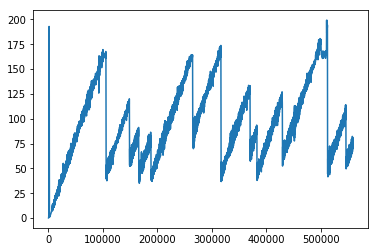

In [55]:
plt.plot(tcp68[:, 0], tcp68[:, 1])

## CTCP Loss 6

In [68]:
ctcplr6 = extract_time_and_throughput('./datadumps/ctcplr6final.dump')
print_throughput_stats(ctcplr6, 0, 0)

Average throughput: 137.814 Mbps
Average available bandwidth: 240.000 Mbps
Utilization: 57.42%


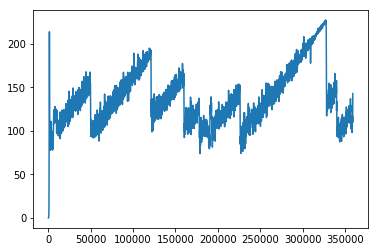

In [69]:
plt.plot(ctcplr6[:, 0], ctcplr6[:, 1])

# CTCP Loss 5

In [70]:
ctcplr5 = extract_time_and_throughput('./datadumps/ctcplr5final.dump')
print_throughput_stats(ctcplr5, 0, 0)

Average throughput: 93.527 Mbps
Average available bandwidth: 240.000 Mbps
Utilization: 38.97%


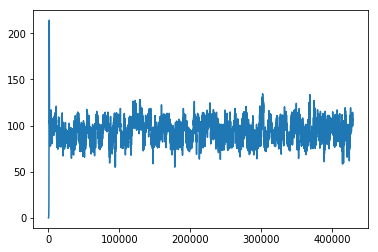

In [72]:
plt.plot(ctcplr5[:, 0], ctcplr5[:, 1])

# CTCP Loss 4

In [73]:
ctcplr4 = extract_time_and_throughput('./datadumps/ctcplr4final.dump')
print_throughput_stats(ctcplr4, 0, 0)

Average throughput: 91.578 Mbps
Average available bandwidth: 240.000 Mbps
Utilization: 38.16%


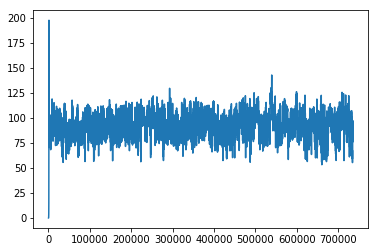

In [75]:
plt.plot(ctcplr4[:, 0], ctcplr4[:, 1])

# CTCP Loss 3

In [76]:
ctcplr3 = extract_time_and_throughput('./datadumps/ctcplr3final.dump')
print_throughput_stats(ctcplr3, 0, 0)

Average throughput: 82.640 Mbps
Average available bandwidth: 240.000 Mbps
Utilization: 34.43%


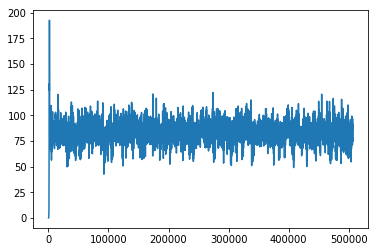

In [77]:
plt.plot(ctcplr3[:, 0], ctcplr3[:, 1])

# CTCP Loss 2

In [78]:
ctcplr2 = extract_time_and_throughput('./datadumps/ctcplr2final.dump')
print_throughput_stats(ctcplr2, 0, 0)

Average throughput: 33.764 Mbps
Average available bandwidth: 240.000 Mbps
Utilization: 14.07%


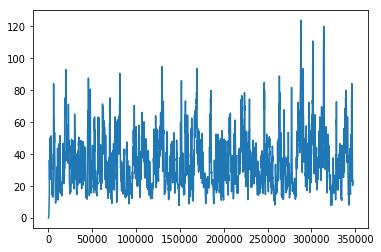

In [79]:
plt.plot(ctcplr2[:, 0], ctcplr2[:, 1])

## TCP Loss 6

In [80]:
tcplr6 = extract_time_and_throughput('./datadumps/tcplr6.dump')
print_throughput_stats(tcplr6, 0, 0)

FileNotFoundError: [Errno 2] No such file or directory: './datadumps/tcplr6.dump'

# TCP Loss 5

In [82]:
tcplr5 = extract_time_and_throughput('./datadumps/tcplr5.dump')
print_throughput_stats(tcplr5, 0, 0)

Average throughput: 43.627 Mbps
Average available bandwidth: 240.000 Mbps
Utilization: 18.18%


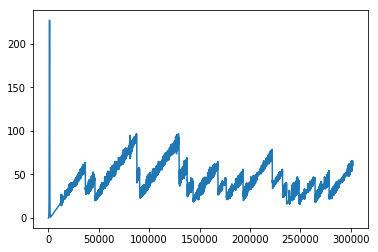

In [83]:
plt.plot(tcplr5[:, 0], tcplr5[:, 1])

# TCP Loss 4

In [84]:
tcplr4 = extract_time_and_throughput('./datadumps/tcplr4.dump')
print_throughput_stats(tcplr4, 0, 0)

Average throughput: 18.489 Mbps
Average available bandwidth: 240.000 Mbps
Utilization: 7.70%


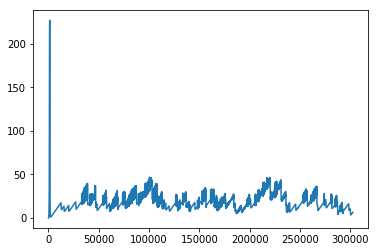

In [85]:
plt.plot(tcplr4[:, 0], tcplr4[:, 1])

# TCP Loss 3

In [86]:
tcplr3 = extract_time_and_throughput('./datadumps/tcplr3.dump')
print_throughput_stats(tcplr3, 0, 0)

Average throughput: 5.606 Mbps
Average available bandwidth: 240.000 Mbps
Utilization: 2.34%


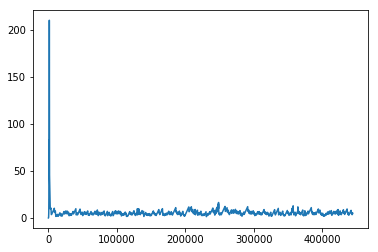

In [87]:
plt.plot(tcplr3[:, 0], tcplr3[:, 1])

# TCP Loss 2

In [91]:
tcplr2 = extract_time_and_throughput('./datadumps/tcplr2.dump')
print_throughput_stats(tcplr2, 0, 0)

Average throughput: 14.906 Mbps
Average available bandwidth: 240.000 Mbps
Utilization: 6.21%


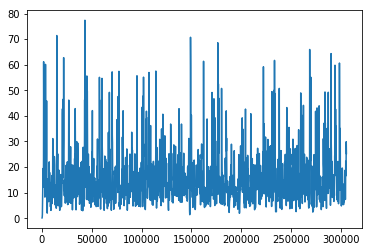

In [92]:
plt.plot(tcplr2[:, 0], tcplr2[:, 1])

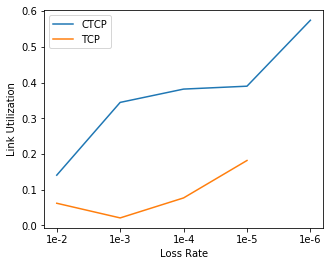

In [102]:
ctcp_tput = np.array([33.764, 82.640, 91.578, 93.527, 137.814])
ctcp_lr = np.array([2, 3, 4, 5, 6])
tcp_tput = np.array([14.91, 5.06, 18.489, 43.627])
tcp_lr = np.array([2, 3, 4, 5])
fig, ax = plt.subplots(figsize=(5,4))

ax.plot(ctcp_lr, ctcp_tput / 240, label='CTCP')
ax.plot(tcp_lr, tcp_tput / 240, label='TCP')
ax.set_ylabel('Link Utilization')
ax.set_xlabel('Loss Rate')
ax.set_xticks(ctcp_lr)
ax.set_xticklabels(['1e-{}'.format(lr) for lr in ctcp_lr])
ax.legend()